In [1]:
import numpy as np
import pandas as pd

In [2]:
# pheno_infname = 'phenotype_HY277.txt'
pheno_infname = 'baseHY-277_v2_77.txt'

in_data_df = pd.read_csv(pheno_infname, sep='\t', dtype={'HospitalID': str})
in_data_df.head()

,SampleName,HospitalID,HDSampleID,ManualSevereType,Severity,ClinicResult,SysSevereType,LastTimeOfSysSevereType,Gender,Age,...,TnIUltra,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,1,0000223383,D2002002751,Ordinary,A,Discharged,2.0,2020-02-12,1.0,51.0,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,2,0000223107,D2002002752,Ordinary,A,Discharged,2.0,2020-01-23,1.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,3,0000222709,D2002002753,Severe,B,Discharged,NaN,NaN,0.0,65.0,...,0.013,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,4,0000222995,D2002002754,Critical,B,Death,4.0,2020-02-16,1.0,63.0,...,11.369,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,5,0000223113,D2002002755,Ordinary,A,Discharged,2.0,2020-01-27,1.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [3]:
col_name = list(in_data_df.columns)
unwant_col = ['SampleName', 'HDSampleID', 'Severity', 'ClinicResult', 'SysSevereType', 'LastTimeOfSysSevereType']
fisrt_labs_f = np.array([x for x in col_name if x not in unwant_col])
print(fisrt_labs_f)
print(len(fisrt_labs_f))

['HospitalID' 'ManualSevereType' 'Gender' 'Age' 'HGB' 'LYMPH#' 'PLT' 'RBC'
 'WBC' 'APTT' 'D-DIC' 'FIB' 'PT' 'TT' '5NT' 'ALP' 'Ca*Pi' 'Ca++' 'CHE'
 'CL' 'GGT' 'K' 'LDH' 'MAO' 'Mg' 'Na' 'Pi-' 'A/G' 'ALB' 'ALT' 'AST'
 'AST/ALT' 'Bc-TR' 'DB' 'GLO' 'ID' 'm-AST' 'PA' 'TB' 'TBA' 'TP' 'FIO2'
 'Lac' 'LACT' 'O2AT' 'PCO2' 'PH' 'PO2' 'AG' 'CHOL' 'CO2' 'Cr' 'CRP'
 'Cys-C' 'eGFR' 'ESR30' 'HDL' 'LDL' 'TG' 'U/C' 'UA' 'Urea' 'β2-M' 'BNP'
 'CK' 'CKMB' 'CTNT' 'HBDH' 'HCY' 'IMA-3V' 'MYO' 'TnIUltra' 'T-CELL'
 'Tc-Count' 'Th-Cell' 'Th-Count' 'TH/TS' 'Ts-Cell' 'Ts-Count' 'IL6' 'PCT']
81


In [6]:
sel_data_df = in_data_df[fisrt_labs_f].copy()

In [7]:
# find columns being string data type
col_inx_has_str = [idx for idx,x in enumerate(sel_data_df.dtypes) if x != 'float64' and idx > 2 ]

# get the string-type column name
fisrt_labs_f[col_inx_has_str]

array(['D-DIC', 'GGT', 'ALT', 'CRP', 'BNP', 'CK', 'CKMB', 'TnIUltra',
       'IL6'], dtype='<U16')

In [8]:
# string data processing

# extract float value
float_regex = r'([+-]?\d+\.\d+|\d+)'
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].str.extract(float_regex, expand=False)
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].astype(float)

sel_data_df['GGT'] = sel_data_df['GGT'].str.extract(float_regex, expand=False)
sel_data_df['GGT'] = sel_data_df['GGT'].astype(float)

sel_data_df['ALT'] = sel_data_df['ALT'].str.extract(float_regex, expand=False)
sel_data_df['ALT'] = sel_data_df['ALT'].astype(float)

sel_data_df['CRP'] = sel_data_df['CRP'].str.extract(float_regex, expand=False)
sel_data_df['CRP'] = sel_data_df['CRP'].astype(float)

sel_data_df['BNP'] = sel_data_df['BNP'].str.extract(float_regex, expand=False)
sel_data_df['BNP'] = sel_data_df['BNP'].astype(float)

sel_data_df['CK'] = sel_data_df['CK'].str.extract(float_regex, expand=False)
sel_data_df['CK'] = sel_data_df['CK'].astype(float)

sel_data_df['CKMB'] = sel_data_df['CKMB'].str.extract(float_regex, expand=False)
sel_data_df['CKMB'] = sel_data_df['CKMB'].astype(float)

sel_data_df['TnIUltra'] = sel_data_df['TnIUltra'].str.extract(float_regex, expand=False)
sel_data_df['TnIUltra'] = sel_data_df['TnIUltra'].astype(float)

sel_data_df['IL6'] = sel_data_df['IL6'].str.extract(float_regex, expand=False)
sel_data_df['IL6'] = sel_data_df['IL6'].astype(float)



In [9]:
# calculate the nan counts for each column
dd = pd.DataFrame(sel_data_df.isnull().sum())
dd

,0
HospitalID,0
ManualSevereType,3
Gender,3
Age,3
HGB,11
...,...
TH/TS,54
Ts-Cell,54
Ts-Count,54
IL6,136


In [10]:
# find columns having nan values (the number of nan > rate*len(df))
rate = 0.5
col_inx_has_nan = [idx for idx,x in enumerate(sel_data_df.isnull().sum()) if x > rate * len(sel_data_df)]

# get the filter-out columns
print(len(fisrt_labs_f[col_inx_has_nan]))
fisrt_labs_f[col_inx_has_nan]

23


array(['5NT', 'ALP', 'Ca*Pi', 'Ca++', 'MAO', 'Mg', 'Pi-', 'Bc-TR',
       'm-AST', 'PA', 'LACT', 'CHOL', 'Cys-C', 'HDL', 'LDL', 'TG', 'UA',
       'β2-M', 'BNP', 'CTNT', 'HBDH', 'HCY', 'IMA-3V'], dtype='<U16')

In [11]:
# get the remain columns
remain_col_inx = list(set(range(len(fisrt_labs_f))) - set(col_inx_has_nan))
remain_col_inx.sort()
print(len(remain_col_inx))
final_colnames = fisrt_labs_f[remain_col_inx]
print(final_colnames)

# obtain the final datafram
final_data_df = sel_data_df[final_colnames].copy()

final_data_df.head()

58
['HospitalID' 'ManualSevereType' 'Gender' 'Age' 'HGB' 'LYMPH#' 'PLT' 'RBC'
 'WBC' 'APTT' 'D-DIC' 'FIB' 'PT' 'TT' 'CHE' 'CL' 'GGT' 'K' 'LDH' 'Na'
 'A/G' 'ALB' 'ALT' 'AST' 'AST/ALT' 'DB' 'GLO' 'ID' 'TB' 'TBA' 'TP' 'FIO2'
 'Lac' 'O2AT' 'PCO2' 'PH' 'PO2' 'AG' 'CO2' 'Cr' 'CRP' 'eGFR' 'ESR30' 'U/C'
 'Urea' 'CK' 'CKMB' 'MYO' 'TnIUltra' 'T-CELL' 'Tc-Count' 'Th-Cell'
 'Th-Count' 'TH/TS' 'Ts-Cell' 'Ts-Count' 'IL6' 'PCT']


,HospitalID,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,...,TnIUltra,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,0000223383,Ordinary,1.0,51.0,158.0,0.99,156.0,5.15,3.53,41.0,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,0000223107,Ordinary,1.0,35.0,136.0,1.59,236.0,4.49,4.62,36.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,0000222709,Severe,0.0,65.0,122.0,0.88,161.0,3.96,4.31,37.9,...,0.013,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,0000222995,Critical,1.0,63.0,170.0,0.31,119.0,5.64,6.79,38.7,...,11.369,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,0000223113,Ordinary,1.0,36.0,151.0,2.37,250.0,5.05,13.55,27.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [12]:
final_colnames

array(['HospitalID', 'ManualSevereType', 'Gender', 'Age', 'HGB', 'LYMPH#',
       'PLT', 'RBC', 'WBC', 'APTT', 'D-DIC', 'FIB', 'PT', 'TT', 'CHE',
       'CL', 'GGT', 'K', 'LDH', 'Na', 'A/G', 'ALB', 'ALT', 'AST',
       'AST/ALT', 'DB', 'GLO', 'ID', 'TB', 'TBA', 'TP', 'FIO2', 'Lac',
       'O2AT', 'PCO2', 'PH', 'PO2', 'AG', 'CO2', 'Cr', 'CRP', 'eGFR',
       'ESR30', 'U/C', 'Urea', 'CK', 'CKMB', 'MYO', 'TnIUltra', 'T-CELL',
       'Tc-Count', 'Th-Cell', 'Th-Count', 'TH/TS', 'Ts-Cell', 'Ts-Count',
       'IL6', 'PCT'], dtype='<U16')

In [13]:
# find the patient without ManualSevereType
final_data_df[final_data_df['ManualSevereType'].isnull()]

,HospitalID,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,...,TnIUltra,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
101,0000223111,NaN,1.0,10.42,137.0,3.79,196.0,4.92,6.72,31.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.03,0.21
120,0000223568,NaN,0.0,51.00,127.0,0.89,163.0,4.46,2.82,35.7,...,NaN,66.5,889.0,38.6,515.0,1.63,23.6,316.0,NaN,0.16
215,0000224097,NaN,0.0,30.00,132.0,2.36,312.0,4.41,4.81,22.5,...,NaN,65.5,1584.0,28.3,685.0,0.75,38.0,919.0,1.58,0.29


In [14]:
final_data_df = final_data_df[~final_data_df['ManualSevereType'].isnull()].reset_index(drop=True)
final_data_df.head()

,HospitalID,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,...,TnIUltra,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,0000223383,Ordinary,1.0,51.0,158.0,0.99,156.0,5.15,3.53,41.0,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,0000223107,Ordinary,1.0,35.0,136.0,1.59,236.0,4.49,4.62,36.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,0000222709,Severe,0.0,65.0,122.0,0.88,161.0,3.96,4.31,37.9,...,0.013,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,0000222995,Critical,1.0,63.0,170.0,0.31,119.0,5.64,6.79,38.7,...,11.369,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,0000223113,Ordinary,1.0,36.0,151.0,2.37,250.0,5.05,13.55,27.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [15]:
final_data_df.shape

(274, 58)

In [16]:
final_data_df['ManualSevereType'].value_counts()

Ordinary    199
Severe       49
Critical     15
Light        11
Name: ManualSevereType, dtype: int64

In [17]:
# convert Severity into ordinary value
ord_val = {'Light': 1, 'Ordinary': 2, 'Severe': 3, 'Critical': 4}       

final_data_df['Label'] = final_data_df['ManualSevereType'].apply(lambda x: ord_val[x])
final_data_df.head()

,HospitalID,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,...,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT,Label
0,0000223383,Ordinary,1.0,51.0,158.0,0.99,156.0,5.15,3.53,41.0,...,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16,2
1,0000223107,Ordinary,1.0,35.0,136.0,1.59,236.0,4.49,4.62,36.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22,2
2,0000222709,Severe,0.0,65.0,122.0,0.88,161.0,3.96,4.31,37.9,...,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16,3
3,0000222995,Critical,1.0,63.0,170.0,0.31,119.0,5.64,6.79,38.7,...,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12,4
4,0000223113,Ordinary,1.0,36.0,151.0,2.37,250.0,5.05,13.55,27.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25,2


# Create dataset for training

In [18]:
y = final_data_df['Label'].values
X_df = final_data_df.drop(columns=['HospitalID', 'ManualSevereType', 'Label']).copy()
X_col_name = list(X_df.columns)
X = X_df.values

# Missing value impute

install missingpy
https://pypi.org/project/missingpy/


In [19]:
from missingpy import MissForest

imputer = MissForest(random_state=1337)
X_imped = imputer.fit_transform(X)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [20]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imped_norm = scaler.fit_transform(X_imped)

# X_df_imped_norm = pd.DataFrame(X_imped_norm, columns=X_col_name) # XGB可以不用作normalization

X_df_imped_norm = pd.DataFrame(X_imped, columns=X_col_name)
X_df_imped_norm.head()

,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,D-DIC,FIB,...,TnIUltra,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,1.0,51.0,158.0,0.99,156.0,5.15,3.53,41.0,0.24,3.84,...,0.017856,86.300,881.00,48.900,499.00,1.4500,33.700,343.00,10.4300,0.16
1,1.0,35.0,136.0,1.59,236.0,4.49,4.62,36.3,0.44,4.46,...,0.006086,72.014,1185.94,42.606,728.44,1.7440,24.549,392.71,15.1700,0.22
2,0.0,65.0,122.0,0.88,161.0,3.96,4.31,37.9,0.65,5.61,...,0.013000,66.400,551.00,47.300,392.00,2.8300,16.700,139.00,33.3357,0.16
3,1.0,63.0,170.0,0.31,119.0,5.64,6.79,38.7,2.85,3.94,...,11.369000,30.300,93.00,18.700,58.00,1.7200,10.900,33.00,79.4500,0.12
4,1.0,36.0,151.0,2.37,250.0,5.05,13.55,27.9,0.22,3.64,...,0.006265,70.662,1855.65,41.218,1209.66,1.7631,23.536,603.65,1.9200,0.25


# Using Xgb as ordinary regression

In [21]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X_df_imped_norm,label=y)

In [22]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.694019,0.011765,1.696043,0.027696
1,1.553170,0.011780,1.556294,0.029153
2,1.428208,0.011614,1.432690,0.029598
3,1.317402,0.011673,1.324267,0.029646
4,1.219575,0.012123,1.227253,0.030584


In [23]:
print((cv_results["test-rmse-mean"]).tail(1))

75    0.497406
Name: test-rmse-mean, dtype: float64


In [24]:
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [10, 20]
# plt.show()

from xgboost import XGBRegressor 
xg_reg = XGBRegressor(**params)
xg_reg.fit(X_df_imped_norm, y)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

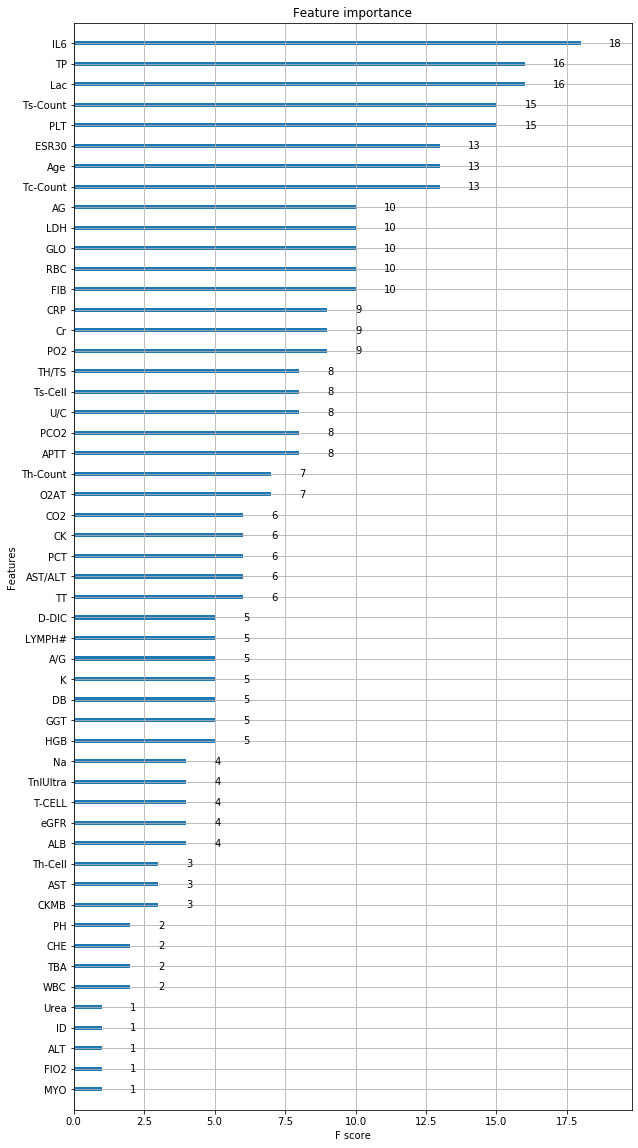

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]
xgb.plot_importance(xg_reg)


# Feature selection based on feature importance

In [27]:
feat_imp = xg_reg.feature_importances_

In [28]:
# select features whose importance greater than 0.01 

# lower_bound = 0.008

# sel_idx = [idx for idx, x in enumerate(feat_imp) if x >= lower_bound]
# sel_cols = np.array(X_col_name)[sel_idx]

# X_df_imped_norm_sel = X_df_imped_norm[sel_cols]
# X_df_imped_norm_sel.head()

In [29]:
# select top features
n_top = 20
top_indx = np.argsort(feat_imp)[::-1][:20]
sel_cols = np.array(X_col_name)[top_indx]
X_df_imped_norm_sel = X_df_imped_norm[sel_cols]
print(sel_cols)
X_df_imped_norm_sel.head()

['Tc-Count' 'Age' 'PO2' 'Ts-Count' 'IL6' 'A/G' 'ALB' 'Th-Count' 'WBC'
 'O2AT' 'Lac' 'PCO2' 'Ts-Cell' 'TT' 'PLT' 'LDH' 'CRP' 'AG' 'RBC' 'AST/ALT']


,Tc-Count,Age,PO2,Ts-Count,IL6,A/G,ALB,Th-Count,WBC,O2AT,Lac,PCO2,Ts-Cell,TT,PLT,LDH,CRP,AG,RBC,AST/ALT
0,881.00,51.0,111.0,343.00,10.4300,1.4464,44.3,499.00,3.53,98.9,1.0,35.7,33.700,15.5,156.0,400.0,11.70,13.7021,5.15,1.7803
1,1185.94,35.0,118.0,392.71,15.1700,1.5690,43.4,728.44,4.62,99.0,1.1,40.4,24.549,14.9,236.0,558.0,35.60,13.3908,4.49,1.4474
2,551.00,65.0,66.0,139.00,33.3357,1.5500,36.8,392.00,4.31,94.5,0.6,34.4,16.700,15.5,161.0,662.0,52.60,10.9500,3.96,3.6700
3,93.00,63.0,66.2,33.00,79.4500,1.2500,35.1,58.00,6.79,91.8,1.1,76.4,10.900,17.2,119.0,720.0,89.94,13.2500,5.64,1.7300
4,1855.65,36.0,92.4,603.65,1.9200,1.8291,48.9,1209.66,13.55,97.5,1.4,43.2,23.536,16.2,250.0,491.0,5.80,10.8096,5.05,1.0070


In [30]:
sel_cols

array(['Tc-Count', 'Age', 'PO2', 'Ts-Count', 'IL6', 'A/G', 'ALB',
       'Th-Count', 'WBC', 'O2AT', 'Lac', 'PCO2', 'Ts-Cell', 'TT', 'PLT',
       'LDH', 'CRP', 'AG', 'RBC', 'AST/ALT'], dtype='<U8')

# retrain model with selected features

In [31]:
xg_reg_ = XGBRegressor(**params)
xg_reg_.fit(X_df_imped_norm_sel, y)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

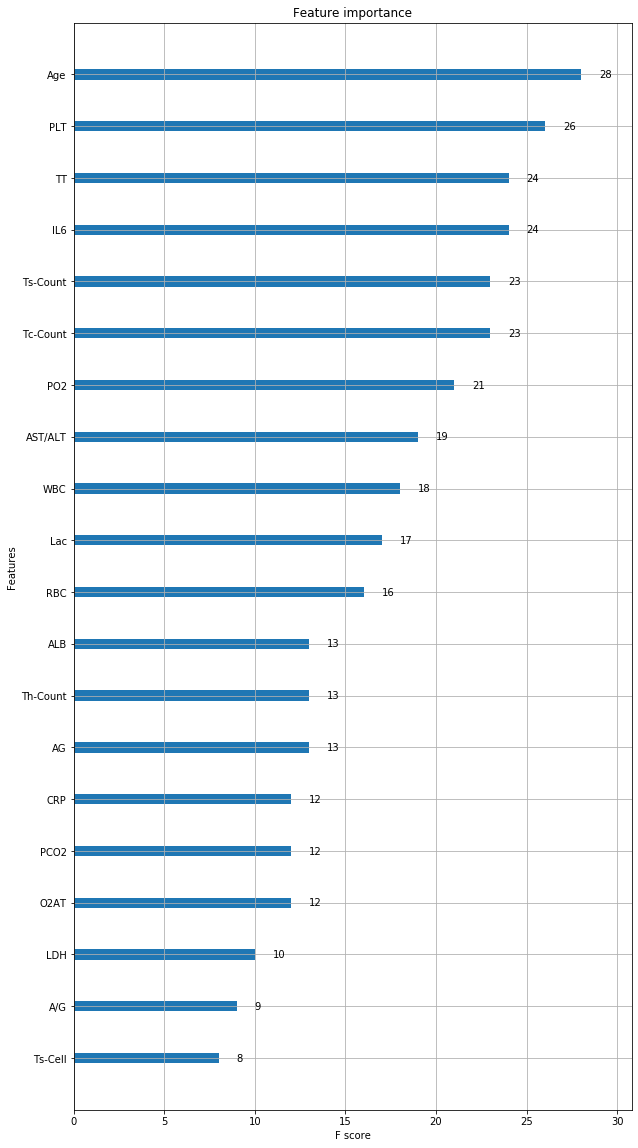

In [32]:
xgb.plot_importance(xg_reg_)

# Prediction

In [33]:
y_pred = xg_reg.predict(X_df_imped_norm)
y_pred_adj = np.array([1 if x < 1 else 4 if x > 4 else x for x in y_pred ])
y_pred_adj_lab = np.round(y_pred_adj)

In [34]:
pred_df = pd.DataFrame(data={'HospitalID': final_data_df['HospitalID'].values,
                            'ManualSevereType': final_data_df['ManualSevereType'].values,
                            #'Y_true': final_data_df['Label'].values,
                            'Score': y_pred_adj,
                            #'Y_pred_label': y_pred_adj_lab
                            })

In [35]:
pred_df

,HospitalID,ManualSevereType,Score
0,0000223383,Ordinary,2.058899
1,0000223107,Ordinary,2.164421
2,0000222709,Severe,2.886481
3,0000222995,Critical,3.118963
4,0000223113,Ordinary,1.896104
...,...,...,...
269,0000224248,Ordinary,1.932502
270,0000224245,Ordinary,2.030895
271,0000223924,Ordinary,2.050036
272,0000223790,Ordinary,2.318395


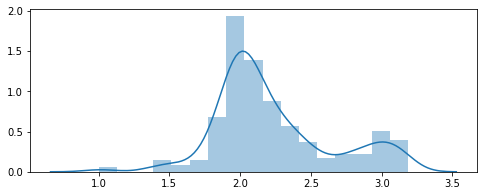

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8, 3))
sns.distplot(pred_df['Score'].values,
             kde=True,ax=ax)


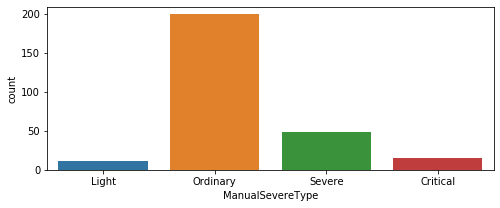

In [43]:
fig, ax = plt.subplots(1,1,figsize=(8, 3))
sns.countplot(x="ManualSevereType", data=pred_df, ax = ax, order=['Light','Ordinary','Severe','Critical'])


In [52]:
pred_df.to_csv('xgb_score_v2.dat', sep='\t', index=False)

In [29]:
from sklearn.metrics import recall_score, precision_score
y_t = pred_df['Y_true'].values
y_p_p = pred_df['Y_pred'].values
y_p_l = pred_df['Y_pred_label'].values

avg_recall = recall_score(y_t, y_p_l, average="weighted")
print('mean recall: {}'.format(avg_recall))
print('mean precision: {}'.format(average_precision))

mean recall: 0.8357664233576643
mean precision: 0.8


/Users/yong/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
